In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
weather = pd.read_csv('weatherHistory.csv')
for i  in weather.index: # Dropping non-logical values for Temp.,Pressure and Humidity.
   Temp = weather.loc[i, 'Temperature (C)']
   if (Temp > 100) or (Temp < -100):
     weather.drop(i,inplace=True)
for i  in weather.index:
    P = weather.loc[i, 'Pressure (millibars)']
    if (P < 870) or (P > 1100):
       weather.drop(i,inplace=True)
for i  in weather.index:
    H = weather.loc[i, 'Humidity']
    if (H <= 0) or (H>1):
       weather.drop(i,inplace=True)
weather.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,95143,95143,94626,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.0,95143.000000,95143
unique,95119,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 13:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31608,84115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20014
mean,NaN,NaN,NaN,11.955182,10.884922,0.735134,10.784588,187.445792,10.382749,0.0,1016.811477,NaN
std,NaN,NaN,NaN,9.539222,10.678341,0.195292,6.891979,107.398981,4.186031,0.0,7.776105,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.120000,0.000000,0.000000,0.000000,0.0,973.780000,NaN
25%,NaN,NaN,NaN,4.744444,2.344444,0.600000,5.812100,116.000000,8.420300,0.0,1012.120000,NaN
50%,NaN,NaN,NaN,12.038889,12.038889,0.780000,9.917600,180.000000,10.046400,0.0,1016.550000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.119700,290.000000,14.908600,0.0,1021.160000,NaN


In [ ]:
#Removing non-numerical data
weather.drop(['Formatted Date','Summary','Precip Type','Daily Summary','Loud Cover'],axis=1,inplace=True)

In [ ]:
X = weather.drop('Apparent Temperature (C)',axis=1)
y = weather['Apparent Temperature (C)']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Trying different models
#Linear Regression
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print(f'Linear Regression:\t Score: {regr.score(x_test, y_test)}, \tMRE: {mean_squared_error(y_test,regr.predict(x_test))}')
#Ridge Regression
ridge_reg = linear_model.Ridge(alpha=.5)
ridge_reg.fit(x_train, y_train)
print(f'Ridge Regression:\t Score: {ridge_reg.score(x_test, y_test)}, \tMRE: {mean_squared_error(y_test,ridge_reg.predict(x_test))}')
#Lasso Regression
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
print(f'Lasso Regression:\t Score: {lasso_reg.score(x_test, y_test)}, \tMRE: {mean_squared_error(y_test,lasso_reg.predict(x_test))}')


Linear Regression:	 Score: 0.9899811692161702, 	MRE: 1.1490089565196027
Ridge Regression:	 Score: 0.9899811591851397, 	MRE: 1.1490101069276695
Lasso Regression:	 Score: 0.9897033386592436, 	MRE: 1.1808719358623208


1. **What type of machine learning problem is this?**

Supervised Learning Problem

2. **How do the features relate to each other and to the
weather conditions?**

Features' relation to each other can be determined by plotting a correlation heatmap (Similar to P4.1). The co-relation between humidity and apparent temperature is the most eminent.
>Apparent temperature, also known as "feels like", is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature. [Source](https://en.wikipedia.org/wiki/Apparent_temperature).

3. **What are the steps involved in preprocessing the
dataset for machine learning?**

Steps include, removing duplicates, removing missing values, and removing non-logical values of temperature, humidity and pressure...etc.

4. **How do we select the best model for our dataset?**

By comparing each model's *.score* method and metrics like *mean squared error*. Ridge Linear Regression was determined to be the most suitable.

5. **What metrics should we use to evaluate the
performance of our weather prediction model?**

*   Score
*   MSE
*   $R^2$ (Coeff. of determination)

6. **Plot the predicted vs true values:**




Text(0, 0.5, 'Predicted Values')

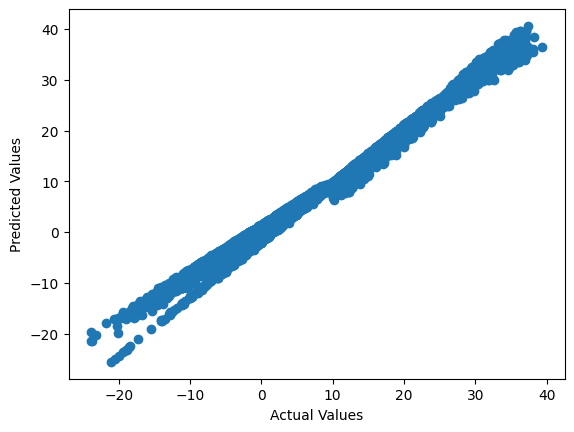

In [ ]:
plt.scatter(y_test,ridge_reg.predict(x_test))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")